In [15]:
[GFP Design](https://colab.research.google.com/github/evolutionaryscale/esm/blob/main/examples/gfp_design.ipynb)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (1129412655.py, line 1)

In [1]:
import biotite.sequence as seq
import biotite.sequence.align as align
import biotite.sequence.graphics as graphics
from getpass import getpass
import matplotlib.pyplot as pl
import py3Dmol
import torch

from esm.sdk import client
from esm.sdk.api import ESM3InferenceClient, ESMProtein, GenerationConfig
from esm.utils.structure.protein_chain import ProteinChain
from esm.models.esm3 import ESM3


In [2]:
model =  ESM3.from_pretrained("esm3_sm_open_v1", device=torch.device("cuda"))

/global/cfs/cdirs/m4734/users/vidyagan/esm_env/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Fetching 22 files:   0%|          | 0/22 [00:00<?, ?it/s]

/global/cfs/cdirs/m4734/users/vidyagan/esm_env/lib/python3.12/site-packages/esm/pretrained.py:68: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(


In [3]:
template_gfp = ESMProtein.from_protein_chain(
    ProteinChain.from_rcsb("1qy3", chain_id="A")
)

template_gfp_tokens = model.encode(template_gfp)

print("Sequence tokens:")
print("    ", ", ".join([
    str(token) for token in template_gfp_tokens.sequence.tolist()
]))

print("Structure tokens:")
print("    ", ", ".join([
    str(token) for token in template_gfp_tokens.structure.tolist()
]))

/global/cfs/cdirs/m4734/users/vidyagan/esm_env/lib/python3.12/site-packages/esm/pretrained.py:29: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(
/glo

Sequence tokens:
     0, 15, 6, 9, 9, 4, 18, 11, 6, 7, 7, 14, 12, 4, 7, 9, 4, 13, 6, 13, 7, 17, 6, 21, 15, 18, 8, 7, 8, 6, 9, 6, 9, 6, 13, 5, 11, 19, 6, 15, 4, 11, 4, 15, 18, 12, 23, 11, 11, 6, 15, 4, 14, 7, 14, 22, 14, 11, 4, 7, 11, 11, 4, 11, 19, 6, 7, 16, 23, 18, 8, 10, 19, 14, 13, 21, 20, 15, 16, 21, 13, 18, 18, 15, 8, 5, 20, 14, 9, 6, 19, 7, 16, 9, 5, 11, 12, 8, 18, 15, 13, 13, 6, 17, 19, 15, 11, 10, 5, 9, 7, 15, 18, 9, 6, 13, 11, 4, 7, 17, 10, 12, 9, 4, 15, 6, 12, 13, 18, 15, 9, 13, 6, 17, 12, 4, 6, 21, 15, 4, 9, 19, 17, 19, 17, 8, 21, 17, 7, 19, 12, 11, 5, 13, 15, 16, 15, 17, 6, 12, 15, 5, 17, 18, 15, 12, 10, 21, 17, 12, 9, 13, 6, 8, 7, 16, 4, 5, 13, 21, 19, 16, 16, 17, 11, 14, 12, 6, 13, 6, 14, 7, 4, 4, 14, 13, 17, 21, 19, 4, 8, 11, 16, 8, 5, 4, 8, 15, 13, 14, 17, 9, 15, 10, 13, 21, 20, 7, 4, 4, 9, 18, 7, 11, 5, 5, 6, 12, 2
Structure tokens:
     4098, 2221, 3124, 1129, 3395, 3019, 1645, 2037, 2490, 60, 1591, 3819, 457, 2708, 383, 2219, 653, 2545, 2984, 3370, 66, 608, 2410, 103

In [4]:
print(len(template_gfp_tokens.sequence.tolist()))
print(len(template_gfp_tokens.structure.tolist()))

229
229


In [5]:
prompt_sequence = ["_"] * len(template_gfp.sequence)
prompt_sequence[59] = "T"
prompt_sequence[62] = "T"
prompt_sequence[63] = "Y"
prompt_sequence[64] = "G"
prompt_sequence[93] = "R"
prompt_sequence[219] = "E"
prompt_sequence = "".join(prompt_sequence)

print(template_gfp.sequence)
print(prompt_sequence)

prompt = model.encode(
    ESMProtein(sequence=prompt_sequence)
)

# We construct an empty structure track like |<bos> <mask> ... <mask> <eos>|...
prompt.structure = torch.full_like(prompt.sequence, 4096)
prompt.structure[0] = 4098
prompt.structure[-1] = 4097
# ... and then we fill in structure tokens at key residues near the alpha helix
# kink and at the stabilizing R and E positions on the beta barrel.
prompt.structure[55:70] = template_gfp_tokens.structure[56:71]
prompt.structure[93] = template_gfp_tokens.structure[93]
prompt.structure[219] = template_gfp_tokens.structure[219]

print("".join(["✔" if st < 4096 else "_" for st in prompt.structure]))

KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFICTTGKLPVPWPTLVTTLTYGVQCFSRYPDHMKQHDFFKSAMPEGYVQEATISFKDDGNYKTRAEVKFEGDTLVNRIELKGIDFKEDGNILGHKLEYNYNSHNVYITADKQKNGIKANFKIRHNIEDGSVQLADHYQQNTPIGDGPVLLPDNHYLSTQSALSKDPNEKRDHMVLLEFVTAAGI
___________________________________________________________T__TYG____________________________R_____________________________________________________________________________________________________________________________E_______
_______________________________________________________✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔_______________________✔_____________________________________________________________________________________________________________________________✔_________


In [6]:
print(prompt.structure)

tensor([4098, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096,
        4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096,
        4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096,
        4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096,
        4096, 4096, 4096, 4096, 4096, 4096, 4096, 1774,  732, 1797,  748, 3403,
        2370, 2582, 3704, 2737, 3007, 1660,  499,  484, 2202, 2786, 4096, 4096,
        4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096,
        4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 1066, 4096, 4096,
        4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096,
        4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096,
        4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096,
        4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4096,
        4096, 4096, 4096, 4096, 4096, 40

In [7]:
%%time

num_tokens_to_decode = (prompt.structure == 4096).sum().item()

structure_generation = model.generate(
    prompt,
    GenerationConfig(
        # Generate a structure.
        track="structure",
        # Sample one token per forward pass of the model.
        num_steps=num_tokens_to_decode,
        # Sampling temperature trades perplexity with diversity.
        temperature=1.0,
    )
)

print("These are the structure tokens corresponding to our new design:")
print("    ", ", ".join([
    str(token) for token in structure_generation.structure.tolist()
]))

# Decodes structure tokens to backbone coordinates.
structure_generation_protein = model.decode(structure_generation)

print("")

100%|██████████| 210/210 [00:11<00:00, 18.37it/s]
/global/cfs/cdirs/m4734/users/vidyagan/esm_env/lib/python3.12/site-packages/esm/pretrained.py:39: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this exp

These are the structure tokens corresponding to our new design:
     4098, 3629, 3902, 3584, 501, 2938, 3681, 1490, 890, 220, 255, 1531, 3633, 824, 548, 3334, 1103, 1114, 3978, 159, 2632, 1582, 1451, 1924, 598, 1416, 415, 1648, 934, 3965, 2945, 1210, 1657, 1336, 653, 586, 2865, 972, 2042, 4070, 3159, 3602, 1142, 2293, 3324, 1686, 2010, 3563, 2222, 1164, 3834, 1645, 3018, 2738, 2587, 1774, 732, 1797, 748, 3403, 2370, 2582, 3704, 2737, 3007, 1660, 499, 484, 2202, 2786, 2707, 1359, 1087, 1246, 1432, 1545, 3449, 3735, 1035, 3671, 4028, 791, 3283, 3028, 885, 1300, 3834, 2096, 78, 788, 1479, 1173, 3673, 1066, 2878, 3965, 2987, 630, 801, 1862, 115, 3325, 4022, 3165, 3626, 2624, 3311, 913, 1328, 2649, 3522, 3307, 1693, 2010, 1739, 854, 2494, 1085, 2012, 3591, 1189, 301, 3021, 1865, 3129, 2272, 43, 791, 2117, 3907, 99, 2029, 2121, 2448, 551, 1326, 3599, 3356, 2725, 1799, 2993, 3675, 440, 2290, 1084, 1617, 558, 2029, 2012, 712, 1174, 1235, 3787, 3902, 379, 2157, 2871, 1510, 1189, 1323, 2170, 384

/global/cfs/cdirs/m4734/users/vidyagan/esm_env/lib/python3.12/site-packages/esm/pretrained.py:49: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(



CPU times: user 11.9 s, sys: 246 ms, total: 12.2 s
Wall time: 18.1 s


In [8]:
view = py3Dmol.view(width=1000, height=500)
view.addModel(structure_generation_protein.to_protein_chain().infer_oxygen().to_pdb_string(), "pdb")
view.setStyle({"cartoon": {"color": "lightgreen"}})
view.zoomTo()
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [9]:
constrained_site_positions = [59, 62, 63, 64, 93, 219]

template_chain = template_gfp.to_protein_chain()
generation_chain = structure_generation_protein.to_protein_chain()

constrained_site_rmsd = template_chain[constrained_site_positions].rmsd(
    generation_chain[constrained_site_positions]
)
backbone_rmsd = template_chain.rmsd(generation_chain)

c_pass = "✅" if constrained_site_rmsd < 1.5 else "❌"
b_pass = "✅" if backbone_rmsd > 1.5 else "❌"

print(f"Constrained site RMSD: {constrained_site_rmsd:.2f} Ang {c_pass}")
print(f"Backbone RMSD: {backbone_rmsd:.2f} Ang {b_pass}")

Constrained site RMSD: 4.63 Ang ❌
Backbone RMSD: 13.23 Ang ✅


In [10]:
%%time

num_tokens_to_decode = (prompt.sequence == 32).sum().item()

sequence_generation = model.generate(
    # Generate a sequence.
    structure_generation,
    GenerationConfig(
        track="sequence",
        num_steps=num_tokens_to_decode,
        temperature=1.0,
    )
)

# Refold
sequence_generation.structure = None
length_of_sequence = sequence_generation.sequence.numel() - 2
sequence_generation = model.generate(
    sequence_generation,
    GenerationConfig(
        track="structure",
        num_steps=length_of_sequence,
        temperature=0.0,
    )
)

# Decode to AA string and coordinates.
sequence_generation_protein = model.decode(sequence_generation)

100%|██████████| 227/227 [00:10<00:00, 20.71it/s]

CPU times: user 21.3 s, sys: 0 ns, total: 21.3 s
Wall time: 21.3 s


In [11]:
sequence_generation_protein.sequence

'DRAIREFFLSQVEKSFKVKAVNFPTNGFGGLNPSNHQINFLYWDAYSRFDAMEYMHEYQTLGTYGMMDSYFNRQLTIMCEDDVVYGYDSSAIVRMWISGTARLTKAIFGRRHDSDSVIGLVAARVPYINTMKNGNGVSVSSVTQLDHWDDVSDIGYVDFDAHSPVAQYTSSHDDTVAGNPTLDSTDTGSWAGIMDRGQADQDGDHLTDRKISRHKYVTFEVTNSGHL'

Sequence identity: 16.79%

Sequence alignment:


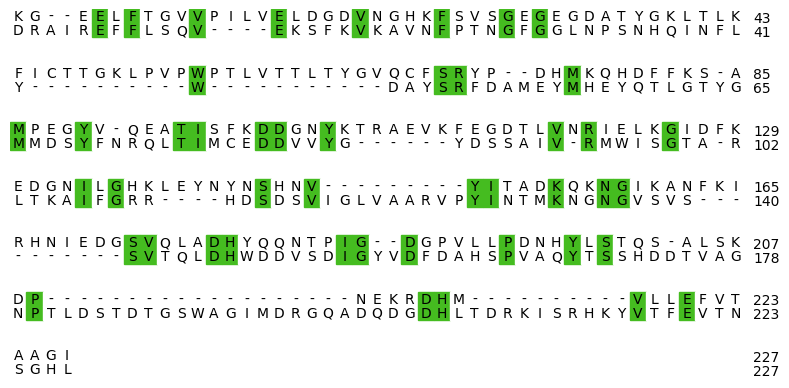

In [12]:
seq1 = seq.ProteinSequence(template_gfp.sequence)
seq2 = seq.ProteinSequence(sequence_generation_protein.sequence)

alignments = align.align_optimal(
    seq1,
    seq2,
    align.SubstitutionMatrix.std_protein_matrix(),
    gap_penalty=(-10, -1),
)

alignment = alignments[0]

identity = align.get_sequence_identity(alignment)
print(f"Sequence identity: {100*identity:.2f}%")

print("\nSequence alignment:")
fig = pl.figure(figsize=(8.0, 4.0))
ax = fig.add_subplot(111)
graphics.plot_alignment_similarity_based(
    ax, alignment, symbols_per_line=45, spacing=2,
    show_numbers=True,
)
fig.tight_layout()
pl.show()

In [13]:
template_chain = template_gfp.to_protein_chain()
generation_chain = sequence_generation_protein.to_protein_chain()

constrained_site_rmsd = template_chain[constrained_site_positions].rmsd(
    generation_chain[constrained_site_positions]
)
backbone_rmsd = template_chain.rmsd(generation_chain)

c_pass = "✅" if constrained_site_rmsd < 1.5 else "❌"
b_pass = "🤷‍♂️"

print(f"Constrained site RMSD: {constrained_site_rmsd:.2f} Ang {c_pass}")
print(f"Backbone RMSD: {backbone_rmsd:.2f} Ang {b_pass}")


Constrained site RMSD: 16.84 Ang ❌
Backbone RMSD: 24.90 Ang 🤷‍♂️


In [14]:
view = py3Dmol.view(width=600, height=600)
view.addModel(sequence_generation_protein.to_pdb_string(), "pdb")
view.setStyle({"cartoon": {"color": "lightgreen"}})
view.zoomTo()
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.